# T-test

## 1. one sample t-test 

In [58]:
# one sample t-test 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# load the data 
df = sns.load_dataset('titanic')
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='age', ylabel='Count'>

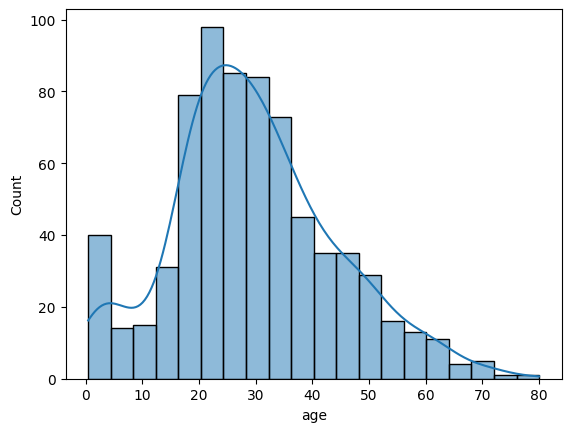

In [59]:
sns.histplot(df['age'], kde=True)

In [60]:
# shpiro wilk test to see the normality of the data
statistic , p  = stats.shapiro(df['age'])
# print the results based on p-value 
if p < 0.05:
    print(f"Reject the null hypothesis ,p-value: {p} The data is not normally distributed")
else:
    print("Accept the null hypothesis , The data is normally distributed")



Accept the null hypothesis , The data is normally distributed


mu = 35 \
is there any difference between ages of people and mu? 

In [61]:
# first we have to impute null values
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)


In [62]:
statistic , p   = stats .ttest_1samp(df['age'],popmean=30)
# print  the results based on p-value
if p < 0.05:
    print(f"Reject the null hypothesis ,p-value: {p} There is a significant difference between the groups")
else:
    print(f"Accept the null hypothesis ,{p} There is no significant difference between the groups")


Accept the null hypothesis ,0.1436375821196688 There is no significant difference between the groups


## 2. Two sample t-test

In [63]:
## lets run the two sample t-test 
statistic , p   = stats.ttest_ind(df[df['sex'] == 'male']['age'],df[df['sex'] == 'female']['age'])
# print  the results 
print(f'statistic: {statistic}')
print(f'p-value: {p}')

print('==============================')
# print  the results based on p-value
if p < 0.05:
    print(f"Reject the null hypothesis ,p-value: {p} There is a significant difference between the groups")
else:
    print(f"fail to reject the null hypothesis ,{p} There is no significant difference between the groups")

statistic: 2.4279606481426024
p-value: 0.015381536989875317
Reject the null hypothesis ,p-value: 0.015381536989875317 There is a significant difference between the groups


# ANOVA

One-way ANOVA  


H0: There is no difference between ages of First,second and third class passengers?  \
H1: There is a significant Difference...

In [85]:
df[['age','class']].head()

,age,class
0,22.0,Third
1,38.0,First
2,26.0,Third
3,35.0,First
4,35.0,Third


In [111]:
# stats model 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# ANOVA test for age and class 
model = ols("age ~ pclass", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

print('==============================')

# print  the results based on p-value
if p < 0.05:
    print(f"Reject the null hypothesis ,p-value: {anova_table['PR(>F)'][0]} There is a significant difference between the groups")
else:
    print(f"fail to reject the null hypothesis ,{anova_table['PR(>F)'][0]} There is no significant difference between the groups")


                 sum_sq     df           F        PR(>F)
pclass     17429.695048    1.0  116.122704  1.558883e-25
Residual  133436.428421  889.0         NaN           NaN
Reject the null hypothesis ,p-value: 1.5588829926632724e-25 There is a significant difference between the groups


## PostHoc Test 

In [98]:
# Tukey HSD pairwise comparisons
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['age'], groups=df['pclass'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -7.0467    0.0 -9.9299 -4.1636   True
     1      3 -10.8795    0.0 -13.226  -8.533   True
     2      3  -3.8328 0.0009 -6.3169 -1.3486   True
----------------------------------------------------


<Axes: xlabel='pclass', ylabel='age'>

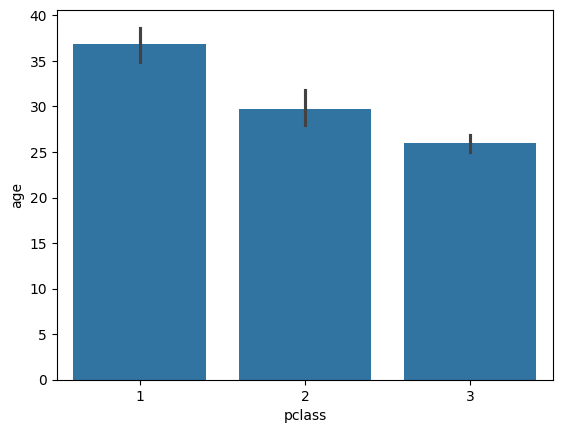

In [102]:
sns.barplot(data=df  , x='pclass', y='age') 

<Axes: xlabel='age', ylabel='Count'>

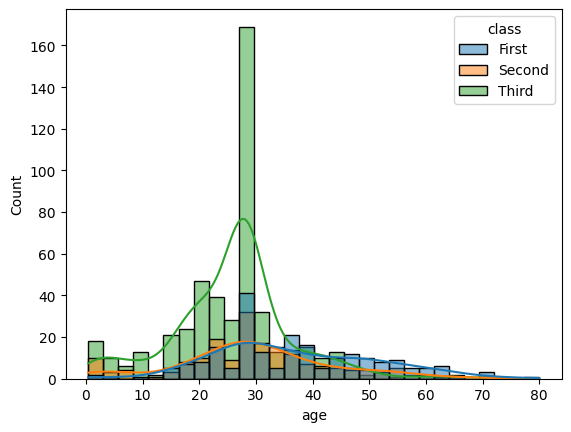

In [105]:
sns.histplot(data = df, x= 'age' , hue='class' ,kde=True)

# Two-way ANOVA 

In [106]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [124]:
# stats model 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# ANOVA test for age and class 
# model = ols("age ~ pclass + who + pclass:who", data=df).fit()

model = ols("age ~sex * who", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

print('==============================')

# print  the results based on p-value
if p < 0.05:
    print(f"Reject the null hypothesis ,p-value: {anova_table['PR(>F)'][0]} There is a significant difference between the groups")
else:
    print(f"fail to reject the null hypothesis ,{anova_table['PR(>F)'][0]} There is no significant difference between the groups")


                sum_sq     df             F        PR(>F)
sex                NaN    1.0           NaN           NaN
who       1.294561e-10    2.0  5.611466e-13  9.999994e-01
sex:who   5.233208e+04    2.0  2.268412e+02  8.119221e-46
Residual  1.023151e+05  887.0           NaN           NaN
Reject the null hypothesis ,p-value: nan There is a significant difference between the groups


In [122]:
# Tukey HSD pairwise comparisons
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(df['age'], df['sex'] + df['who'], alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
femalechild femalewoman  24.0084    0.0  19.4706  28.5462   True
femalechild   malechild  -1.7426 0.8815  -7.8152   4.3301  False
femalechild     maleman  24.7693    0.0  20.3881  29.1505   True
femalewoman   malechild  -25.751    0.0 -30.4333 -21.0686   True
femalewoman     maleman   0.7609 0.7773   -1.299   2.8207  False
  malechild     maleman  26.5118    0.0  21.9811  31.0426   True
----------------------------------------------------------------


<Axes: xlabel='who', ylabel='age'>

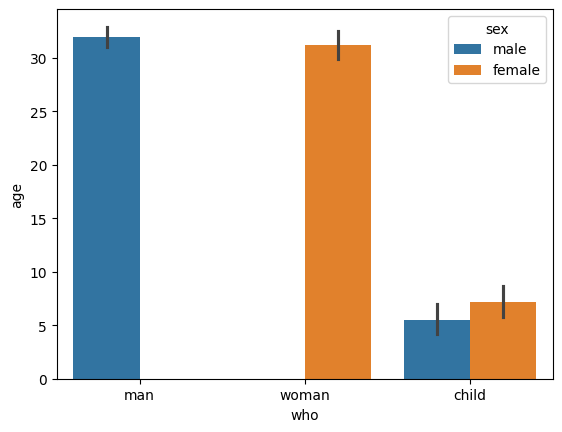

In [130]:
sns.barplot(data=df  , x='who', y='age' , hue='sex')